In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = 'C:/Users/user/Desktop/recording2'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backgroundNoise', 'ㄏㄧㄡ', 'ㄟ', '他', '你', '吼', '啦', '嗯', '好', '我', '的', '的一個', '的這個', '的那個', '著', '那', '那那個', '阿']


In [3]:
# Settings
feature_sets_path = './'
feature_sets_filename = '16k_wen.npz'
#model_filename = 'wake_word_stop_model.h5'
#wake_word = '嗯'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[10.  2.  3. 11. 10. 15.  8. 14.  6.  7. 10. 11.  6.  0. 17.  6.  5.  5.
 14.  8.  9.  3.  5.  8.  0.  4.  2. 11.  8. 12.  3. 13.  5. 15. 10. 16.
 13.  7. 16.  8.  2.  0.  4.  1. 15. 15. 13. 14.  8.  1.  9.  7.  3.  6.
 13. 13. 13. 10. 16.  5. 17.  0.  2. 11. 11. 16.  7. 10.  0.  5.  2. 12.]
[ 6.  9.  3.  3.  1. 12. 17. 15. 16. 10. 13.  4. 11.  6.  6. 14. 15. 17.
  8. 11. 13. 10.  4. 17.  1. 16.  0. 17.  8. 10. 15. 11.  2.  5.  7. 16.
  2. 10. 15. 17.  4.  3.  3.  4.  8.  6.  1.  4.  6.  8. 17. 11.  4.  0.
  0. 13.  5.  6.  1.  7. 17.  1. 15.  0. 14.  0.  9. 14. 15.  5.  3.  8.
  7.  5. 13. 13. 10. 15. 13.  8.  8. 14. 10.  9.  3. 11.  8. 10.  0.  6.
 14.  6. 13.  7.  4. 12.  5. 10.  6. 16.  2. 16. 14. 16. 10.  7.  3. 14.
  2.  0. 13. 15. 16. 11.  1. 17. 10. 17.  6. 15. 16.  7. 15. 14. 10. 15.
  9.  5. 10. 15.  1.  0. 10. 13.  1. 16.  1.  8.  2.  5.  2. 12.  3. 15.
 10.  9.  7.  8.  7.  7.  0. 16.  9. 10. 13. 17.  7.  4.  2.  8.  1.  3.
  5. 17.  8.  1.  9. 15.  5.  8. 11.  2.  6.  7.  

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(576, 23, 16)
(72, 23, 16)
(72, 23, 16)


In [7]:
# Peek at labels
print(y_val)

[ 4.  7. 13. 12. 13. 12.  9. 17. 10.  1. 14.  9.  4.  0. 11.  6.  1.  6.
  1.  7. 11.  0. 15.  8. 11. 11. 17. 11.  3. 12.  6. 14.  8. 12. 16.  4.
  2. 10.  0.  2. 16. 10.  7. 17.  1.  6.  6.  3. 13. 16. 11. 15. 15.  7.
 12.  1. 17. 14.  3.  2.  3.  5. 13.  9. 14. 12. 11.  9.  7.  3. 16. 15.]


In [8]:
# Peek at labels after conversion
print(y_test)

[10.  2.  3. 11. 10. 15.  8. 14.  6.  7. 10. 11.  6.  0. 17.  6.  5.  5.
 14.  8.  9.  3.  5.  8.  0.  4.  2. 11.  8. 12.  3. 13.  5. 15. 10. 16.
 13.  7. 16.  8.  2.  0.  4.  1. 15. 15. 13. 14.  8.  1.  9.  7.  3.  6.
 13. 13. 13. 10. 16.  5. 17.  0.  2. 11. 11. 16.  7. 10.  0.  5.  2. 12.]


In [9]:
# View the dimensions of our input data
print(x_train.shape)

(576, 23, 16)


In [10]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(576, 23, 16, 1)
(72, 23, 16, 1)
(72, 23, 16, 1)


In [11]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 16, 1)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(64, (2, 2), activation='relu'))#64
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.05))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#64
model.add(layers.Dropout(0.05))
#model.add(layers.Dense(18, activation='sigmoid'))
model.add(layers.Dense(18, activation='softmax'))
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 7, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 64)         8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 2, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 1, 128)         0

In [13]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'adam'
              metrics=['acc'])

In [14]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=300,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Epoch 1/300
12/12 [==============================] - 2s 87ms/step - loss: 2.9367 - acc: 0.0961 - val_loss: 2.7916 - val_acc: 0.1111
Epoch 2/300
12/12 [==============================] - 0s 13ms/step - loss: 2.7313 - acc: 0.1682 - val_loss: 2.5771 - val_acc: 0.1667
Epoch 3/300
12/12 [==============================] - 0s 12ms/step - loss: 2.4981 - acc: 0.1984 - val_loss: 2.3216 - val_acc: 0.1667
Epoch 4/300
12/12 [==============================] - 0s 13ms/step - loss: 2.2028 - acc: 0.2985 - val_loss: 1.9545 - val_acc: 0.4583
Epoch 5/300
12/12 [==============================] - 0s 14ms/step - loss: 1.8715 - acc: 0.4379 - val_loss: 1.6424 - val_acc: 0.5417
Epoch 6/300
12/12 [==============================] - 0s 13ms/step - loss: 1.5701 - acc: 0.5177 - val_loss: 1.1601 - val_acc: 0.7222
Epoch 7/300
12/12 [==============================] - 0s 13ms/step - loss: 1.2569 - acc: 0.6101 - val_loss: 0.9773 - val_acc: 0.6944
Epoch 8/300
12/12 [==============================] - 0s 13ms/step - loss: 1.

12/12 [==============================] - 0s 14ms/step - loss: 0.0157 - acc: 0.9938 - val_loss: 0.0673 - val_acc: 0.9722
Epoch 63/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0116 - acc: 0.9979 - val_loss: 0.0675 - val_acc: 0.9583
Epoch 64/300
12/12 [==============================] - 0s 14ms/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0736 - val_acc: 0.9583
Epoch 65/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0076 - acc: 0.9993 - val_loss: 0.0728 - val_acc: 0.9722
Epoch 66/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0896 - val_acc: 0.9583
Epoch 67/300
12/12 [==============================] - 0s 14ms/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.0828 - val_acc: 0.9583
Epoch 68/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0079 - acc: 0.9983 - val_loss: 0.0595 - val_acc: 0.9583
Epoch 69/300
12/12 [==============================] - 0s 12ms/step - loss: 0.0087 

12/12 [==============================] - 0s 13ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0160 - val_acc: 1.0000
Epoch 124/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0110 - val_acc: 1.0000
Epoch 125/300
12/12 [==============================] - 0s 13ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 126/300
12/12 [==============================] - 0s 14ms/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.0083 - val_acc: 1.0000
Epoch 127/300
12/12 [==============================] - 0s 16ms/step - loss: 0.0023 - acc: 0.9997 - val_loss: 0.0443 - val_acc: 0.9861
Epoch 128/300
12/12 [==============================] - 0s 18ms/step - loss: 0.0042 - acc: 0.9991 - val_loss: 0.0453 - val_acc: 0.9861
Epoch 129/300
12/12 [==============================] - 0s 18ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1567 - val_acc: 0.9583
Epoch 130/300
12/12 [==============================] - 0s 14ms/step - loss: 

12/12 [==============================] - 0s 14ms/step - loss: 0.0081 - acc: 0.9987 - val_loss: 0.1278 - val_acc: 0.9722
Epoch 185/300
12/12 [==============================] - 0s 19ms/step - loss: 0.0134 - acc: 0.9973 - val_loss: 0.1356 - val_acc: 0.9583
Epoch 186/300
12/12 [==============================] - 0s 17ms/step - loss: 0.0175 - acc: 0.9930 - val_loss: 0.0628 - val_acc: 0.9861
Epoch 187/300
12/12 [==============================] - 0s 12ms/step - loss: 0.0153 - acc: 0.9953 - val_loss: 0.0600 - val_acc: 0.9722
Epoch 188/300
12/12 [==============================] - 0s 12ms/step - loss: 0.0288 - acc: 0.9934 - val_loss: 0.1588 - val_acc: 0.9167
Epoch 189/300
12/12 [==============================] - 0s 15ms/step - loss: 0.0389 - acc: 0.9819 - val_loss: 0.1167 - val_acc: 0.9722
Epoch 190/300
12/12 [==============================] - 0s 18ms/step - loss: 0.0351 - acc: 0.9913 - val_loss: 0.2045 - val_acc: 0.9306
Epoch 191/300
12/12 [==============================] - 0s 12ms/step - loss: 

Epoch 245/300
12/12 [==============================] - 0s 12ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0397 - val_acc: 0.9861
Epoch 246/300
12/12 [==============================] - 0s 21ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0187 - val_acc: 0.9861
Epoch 247/300
12/12 [==============================] - 0s 17ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9861
Epoch 248/300
12/12 [==============================] - 0s 18ms/step - loss: 2.7602e-04 - acc: 1.0000 - val_loss: 0.1098 - val_acc: 0.9861
Epoch 249/300
12/12 [==============================] - 0s 20ms/step - loss: 8.7780e-04 - acc: 1.0000 - val_loss: 0.0973 - val_acc: 0.9861
Epoch 250/300
12/12 [==============================] - 0s 12ms/step - loss: 2.9527e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9861
Epoch 251/300
12/12 [==============================] - 0s 12ms/step - loss: 0.0014 - acc: 0.9993 - val_loss: 0.0821 - val_acc: 0.9861
Epoch 252/300
12/12 [=============================

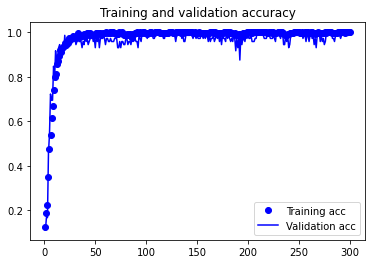

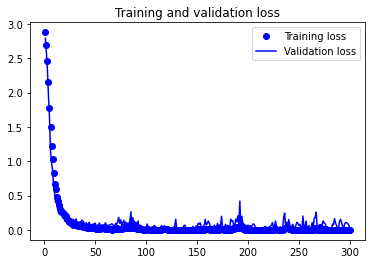

In [15]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# Save the model as a file
models.save_model(model, './h5/appendEnergyTT_wen.h5')

In [17]:
# TEST: Load model and run it against test set
model = models.load_model('./h5/appendEnergyTT_wen.h5')
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 10.0  Prediction: [[1.00277384e-10 2.10497760e-07 6.92242216e-13 7.36472217e-09
  1.97860894e-11 1.24288514e-12 6.67583189e-09 2.80271022e-04
  1.61731011e-11 6.05031289e-07 9.99713838e-01 7.47831752e-09
  6.10194256e-11 3.80636038e-06 1.25121392e-06 9.55492130e-09
  7.72408271e-09 1.78635259e-10]]
Answer: 2.0  Prediction: [[8.9544941e-11 1.0526715e-09 9.9999952e-01 2.6041935e-10 7.5444220e-08
  3.3208988e-10 2.2675079e-11 2.3986892e-09 2.7827829e-09 3.3829622e-07
  2.8520637e-13 5.4110587e-09 7.9158635e-10 6.6513217e-10 1.4939962e-11
  1.6469004e-08 4.0054724e-13 4.0013976e-08]]
Answer: 3.0  Prediction: [[4.9733367e-11 6.2404643e-10 5.4186850e-05 9.9978751e-01 6.9168259e-08
  1.6241485e-13 4.4295724e-08 2.8487699e-08 2.1540608e-10 3.1723140e-09
  2.9437759e-13 3.0420046e-09 7.0504541e-07 3.8863703e-09 1.7175275e-10
  3.4405980e-06 1.5012852e-04 3.8306803e-06]]
Answer: 11.0  Prediction: [[2.0218235e-24 2.3381842e-08 3.1929803e-09 1.1406790e-16 4.1101691e-18
  1.6654058e-23 7.91

In [18]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2458 - acc: 0.9306


[0.24581336975097656, 0.9305555820465088]

In [19]:
model.evaluate(x=x_train, y=y_train)

18/18 [==============================] - 0s 3ms/step - loss: 0.0109 - acc: 0.9965


[0.010937928222119808, 0.9965277910232544]

In [20]:
model.evaluate(x=x_val, y=y_val)

3/3 [==============================] - 0s 2ms/step - loss: 0.0187 - acc: 1.0000


[0.018656158819794655, 1.0]